   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


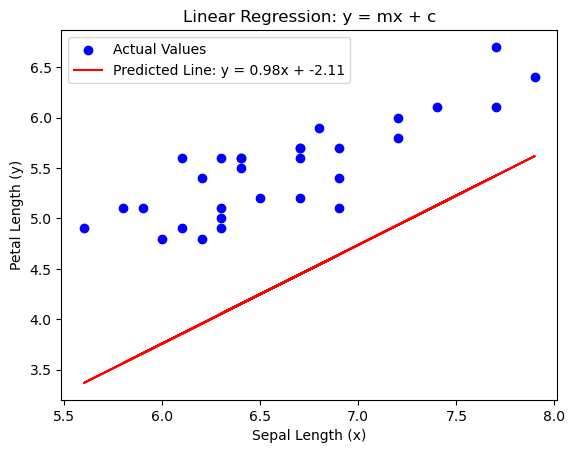

Slope (m): 0.9781669559488876
Intercept (c): -2.109290232929145


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self):
        self.m = None  # Slope
        self.c = None  # Intercept

    def train(self, x, y, iterations=1000, alpha=0.01):
        """
        Trains the model using gradient descent to find m (slope) and c (intercept).
        """
        self.m = 0  # Initialize slope
        self.c = 0  # Initialize intercept

        n = x.shape[0]  # Number of samples
        for _ in range(iterations):
            y_pred = self.m * x + self.c  # Predicted y values

            # Calculate deviations (errors)
            del_y = y - y_pred
            del_x = x

            # Gradients for slope (m) and intercept (c)
            grad_m = -(2 / n) * np.sum(del_x * del_y)
            grad_c = -(2 / n) * np.sum(del_y)

            # Update m and c
            self.m -= alpha * grad_m
            self.c -= alpha * grad_c

    def predict(self, x):
        """
        Predicts y values for the given x values using the trained m and c.
        """
        return self.m * x + self.c


if __name__ == "__main__":
    # Load the dataset
    data = pd.read_csv('iris.csv')
    print(data.head())

    # Define x and y (input and target variables)
    x = data[['sepal_length']].values.flatten()  # Independent variable
    y = data['petal_length'].values  # Dependent variable

    # Calculate means for x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Split the data into training and testing sets
    split_index = int(0.8 * len(data))
    x_train, y_train = x[:split_index], y[:split_index]
    x_test, y_test = x[split_index:], y[split_index:]

    # Train the linear regression model
    model = SimpleLinearRegression()
    model.train(x_train, y_train, iterations=1000, alpha=0.01)

    # Predict y values for the test data
    y_pred = model.predict(x_test)

    # Visualize the results
    plt.scatter(x_test, y_test, color='blue', label='Actual Values')
    plt.plot(x_test, y_pred, color='red', label=f'Predicted Line: y = {model.m:.2f}x + {model.c:.2f}')
    plt.xlabel('Sepal Length (x)')
    plt.ylabel('Petal Length (y)')
    plt.title('Linear Regression: y = mx + c')
    plt.legend()
    plt.show()

    # Print model parameters
    print("Slope (m):", model.m)
    print("Intercept (c):", model.c)
